In [23]:
import numpy as np
import sympy
from sympy import symbols, Eq, linear_eq_to_matrix
import random
import matplotlib.pyplot as plt
from collections import deque, defaultdict
# from pyeda.inter import expr, exprvar, expr2bdd
from dd.autoref import BDD
import networkx as nx
from matplotlib.colors import ListedColormap
import itertools
import pandas as pd
from sympy.logic.boolalg import SOPform
import re
import pickle
import datetime
import time
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from itertools import product
import seaborn as sns
from collections import deque


# change the code to save the data in sqlite database or pickle file to store the results
    # store number of devices in each path
    # Store currents in each path for future plots

#make code run in hipergator

#run upto 3-bit adder for optimal solution with 10 iterations and generate graphs

#############################################################################

#find and pinpoint cases that get only max zeros and min ones current

# 1 - (number of devices)
# 0 - (neighbour lrs devices to ground)
# run the simulation for only those special cases
import sys
import os
import importlib

In [24]:
# Insert the parent directory (one level up) into sys.path:
parent_dir = os.path.abspath("..")  # or an explicit path to the parent
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# First import the module in a normal way:
import PathVerification

# Whenever you make changes in PathVerification.py (where PATH is defined),
# run these two lines to reload the module:
importlib.reload(PathVerification)
from PathVerification import PATH

In [26]:
filename_lst = {str(i)+"-bitAdder":"../bdds/AndOperations/"+"BDDSize"+str(i)+".sbdd" for i in range(1, 18+1)}
with open("Data/truth_tables_data.pkl", "rb") as f:
    truth_tables_data = pickle.load(f)

Functional_Logic_Of_Path_Crossbar_Programings = {}
for adderbit in range(1, 18+1):
    start_time = time.time()
    adder_index = adderbit-1
    filename = filename_lst[str(adderbit)+'-bitAdder']

    # if(adderbit<10):
    #     outputs, df = truth_tables_data[str(adderbit)+'-bitAdder']["outputs"], truth_tables_data[str(adderbit)+'-bitAdder']["TruthTable_df"]
    #     a=1
    # else:
    #     outputs, df = None, None
        
    path = PATH(CrossbarGridSize = 64)
    # path.TruthTable_to_BooleanExpression(df, outputs=outputs)
    # path.BooleanExpresions_to_BDD()
    # print("----------------------------------------------------------------------------------------------")
    # expressions = {'F0' : '(a & b) | (a & cin) | (b & cin)',
    # 'F1' : '(a & b & cin) | (a & ~b & ~cin) | (b & ~a & ~cin) | (cin & ~a & ~b)'}
    # variables = ['a', 'b', 'cin']
    # path.SetBooleanExpressionsAndVaribles(variables = variables, expressions = expressions, outputs = list(expressions.keys()))
    # print("----------------------------------------------------------------------------------------------")
    
    # path.SetBooleanExpressionsAndVaribles(variables = None, expressions = None, outputs = outputs, OriginalTruthTable=df)
    path.parse_file_to_NetworkXGraph(filename)
    path.BDD_to_NetworkXGraph()
    if(adderbit<=6):
        path.Verify_BDD_to_NetworkXGraph(withExpression=False, withOriginalTruthTable=False, generateFromBDD=True)
    # path.VisuvaliseNetworkXGraph()
    # print("----------------------------------------------------------------------------------------------")
    path.GraphPreprocessing()
    # if(adderbit==1):
    #     path.VisuvaliseNetworkXGraph()
    # print("----------------------------------------------------------------------------------------------")
    path.GraphTransformation()
    # path.VisuvaliseNetworkXGraph(bipartite=True)
    # print("----------------------------------------------------------------------------------------------")
    path.GraphCompression()
    # if(adderbit==1):
    #     path.VisuvaliseNetworkXGraph(bipartite=True)
    # print("----------------------------------------------------------------------------------------------")

    path.LongestpathInTreeAndCrossbar()
    
    path.CrossbarRelalization()
    # if(adderbit==1):
    #     path.VisuvaliseCrossbar()
    if(adderbit<=6):
        path.Verify_All_Ideal_Paths_In_Crossbar(checkWithOriginal=False, checkWithBDD=True)

    # print('path.AllIdealPathOfCurrent',path.AllIdealPathOfCurrent.keys())
    
    # print(path.OutputLine_Map)
    # print(path.SBDD_dimentions)
    # print("total_Paths2========>",len(path.AllIdealPathOfCurrent.keys()))

    # print('path.CrossbarLongPaths',path.CrossbarLongPaths)
    
    Functional_Logic_Of_Path_Crossbar_Programings[str(adderbit)+'-bitAdder'] = {'Crossbar':path.CrossbarResistiveStates, 'Bitlines':path.Bitlines, 'TruthTable':path.BDDTruthTable, 'OutputLine_Map':path.OutputLine_Map, 'AdderBit':str(adderbit)+'-bitAdder', 'SBDD (V x E)':path.SBDD_dimentions, 'AllIdealPathOfCurrent': path.AllIdealPathOfCurrent, 'CountOfLongestPath':path.CountOfLongestPath, 'CrossbarLongPaths':path.CrossbarLongPaths, 'End_Bitline_Output_Line': path.End_Bitline_Output_Line}
    
    print(f"Iteration {adderbit} took {time.time() - start_time:.6f} seconds")

    # print('path.CrossbarLongPaths',path.CrossbarLongPaths)
    print("----------------------------------------------------------------------------------------------")
    if(adderbit==6):
        break

# Save (pickle) to a file
with open("Data/Functional_Logic_Of_Path_Crossbar_Programings.pkl", "wb") as f:
    pickle.dump(Functional_Logic_Of_Path_Crossbar_Programings, f)

print("Data saved to multi_data.pkl")

BDD verification completed.
Suitable Crossbar size: 64
Verifying all ideal paths in the crossbar...
Crossbar verification completed. Total mismatches: 0
Iteration 1 took 0.008001 seconds
----------------------------------------------------------------------------------------------
BDD verification completed.
Suitable Crossbar size: 64
Verifying all ideal paths in the crossbar...
Crossbar verification completed. Total mismatches: 0
Iteration 2 took 0.012587 seconds
----------------------------------------------------------------------------------------------
BDD verification completed.
Suitable Crossbar size: 64
Verifying all ideal paths in the crossbar...
Crossbar verification completed. Total mismatches: 0
Iteration 3 took 0.020548 seconds
----------------------------------------------------------------------------------------------
BDD verification completed.
Suitable Crossbar size: 64
Verifying all ideal paths in the crossbar...
Crossbar verification completed. Total mismatches: 0
I

In [27]:
# def generate_adder_truth_table(num_bits: int):
#     """
#     Generate a truth table for an N-bit adder with carry-in and carry-out.
    
#     Inputs: a0..a{num_bits-1}, b0..b{num_bits-1}, cin
#     Outputs: sum0..sum{num_bits-1}, cout
    
#     Returns:
#         df (pd.DataFrame): the truth table
#         outputs (List[str]): list of output column names
#     """
#     # Prepare column names for inputs
#     a_cols = [f"a{i}" for i in range(num_bits)]
#     b_cols = [f"b{i}" for i in range(num_bits)]
#     input_cols = a_cols + b_cols + ["cin"]
    
#     # Prepare column names for outputs
#     sum_cols = [f"sum{i}" for i in range(num_bits)]
#     outputs = sum_cols + ["cout"]
    
#     # List to store all rows of the truth table
#     rows = []
    
#     # Iterate over all possible values of A, B, and carry-in
#     # A and B each go from 0 to (2^num_bits - 1), cin from 0 to 1
#     for a_val in range(2**num_bits):
#         for b_val in range(2**num_bits):
#             for cin_val in [0, 1]:
#                 # Calculate the actual sum
#                 total = a_val + b_val + cin_val
                
#                 # The sum in binary will have up to num_bits+1 bits
#                 # because of a possible carry-out
#                 sum_bin = f"{total:0{num_bits+1}b}"
                
#                 # Lower num_bits bits are the sum bits
#                 # The leftmost bit is the final carry out if it exists
#                 # For an N-bit sum + carry out, sum_bin has (N+1) bits
#                 sum_part = sum_bin[-num_bits:]      # last N bits
#                 carry_out = sum_bin[0:-(num_bits)]  # leading bits (could be more than 1 if total is large, but typically 1 or 0)
                
#                 # If sum_bin has more than N+1 bits, carry_out could be more than 1 digit in theory.
#                 # Usually for an N-bit adder, we only look at the final 1 bit of carry out.
#                 # So we can treat the carry_out as the leftmost bit (or 0 if length < 2).
#                 cout_val = int(carry_out, 2) if carry_out else 0
                
#                 # Decompose a_val, b_val into bits
#                 # We'll get each bit from least significant to most significant
#                 a_bits = [(a_val >> i) & 1 for i in range(num_bits)]
#                 b_bits = [(b_val >> i) & 1 for i in range(num_bits)]
                
#                 # Build the row dictionary
#                 row = {}
#                 # Fill in a_i columns
#                 for i in range(num_bits):
#                     row[f"a{i}"] = a_bits[i]
#                 # Fill in b_i columns
#                 for i in range(num_bits):
#                     row[f"b{i}"] = b_bits[i]
                
#                 # Carry in
#                 row["cin"] = cin_val
                
#                 # sum bits
#                 for i in range(num_bits):
#                     row[f"sum{i}"] = int(sum_part[num_bits - 1 - i])  # reverse indexing
#                 row["cout"] = cout_val
                
#                 rows.append(row)
    
#     df = pd.DataFrame(rows, columns=input_cols + outputs)
#     return df, outputs

# # Example usage for different bit widths:
# df, outputs = generate_adder_truth_table(1)

# print("1-bit Adder Truth Table:")
# # print(df)
# print("Outputs:", outputs)
# df

In [28]:
# tt_no = 10
# truth_tables_data = {}

# for i in range(1, tt_no + 1):
#     start_time = time.time()  # Record start
    
#     df, outputs = generate_adder_truth_table(i)
#     truth_tables_data[str(i)+'-bitAdder'] = {"outputs":outputs, "TruthTable_df":df}
    
#     print(f"Iteration {i} took {time.time() - start_time:.6f} seconds")

# # Save (pickle) to a file
# with open("Data/truth_tables_data.pkl", "wb") as f:
#     pickle.dump(truth_tables_data, f)

# print("written in truth_tables_data.pkl")

In [29]:
bit_sizes_and_length = []

for adderBit in Functional_Logic_Of_Path_Crossbar_Programings:
    length_frequency = {}
    for entry in Functional_Logic_Of_Path_Crossbar_Programings[adderBit]['AllIdealPathOfCurrent'].values():
        for key in entry:
            length = entry[key]['lengthOfDevices']
            if length in length_frequency:
                length_frequency[length] += 1
            else:
                length_frequency[length] = 1
    
    # Print frequency counts
    print("Frequency of LengthOfDevices values:")
    for length, count in length_frequency.items():
        print(f"Length {length}: {count} times")
        bit_sizes_and_length.append(f"Len. {length}")
    print()

Frequency of LengthOfDevices values:
Length 9: 1 times

Frequency of LengthOfDevices values:
Length 11: 1 times

Frequency of LengthOfDevices values:
Length 13: 1 times

Frequency of LengthOfDevices values:
Length 15: 1 times

Frequency of LengthOfDevices values:
Length 17: 1 times

Frequency of LengthOfDevices values:
Length 19: 1 times



In [30]:
# First import the module in a normal way:
import AnalogTestingOfPathCrossbar  

# Whenever you make changes in PathVerification.py (where PATH is defined),
# run these two lines to reload the module:
importlib.reload(AnalogTestingOfPathCrossbar)
from AnalogTestingOfPathCrossbar import AnalogTestingOfPathCrossbar

In [31]:
with open("Data/Functional_Logic_Of_Path_Crossbar_Programings.pkl", "rb") as f:
    Functional_Logic_Of_Path_Crossbar_Programings = pickle.load(f)
Functional_Logic_Of_Path_Crossbar_Programings_keys = list(Functional_Logic_Of_Path_Crossbar_Programings.keys())

Adder_guardbandsVsReistancesDetailsMaps_opt = {}

In [32]:
start = 0
iterations = 1

opt_min_One, opt_max_Zero = [], []
for i in range(start, len(Functional_Logic_Of_Path_Crossbar_Programings_keys)):
    adderName = Functional_Logic_Of_Path_Crossbar_Programings_keys[i]
    Functional_Logic_Of_Path_Crossbar_Programing_map = Functional_Logic_Of_Path_Crossbar_Programings[adderName]
    
    start_time = time.time()
    start_dt = datetime.datetime.fromtimestamp(start_time)

    n = len(Functional_Logic_Of_Path_Crossbar_Programing_map['Crossbar'])
    print(f"processing {adderName}. Crossbar dim.:{n}x{n} Started on {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
    Crossbar = Functional_Logic_Of_Path_Crossbar_Programing_map['Crossbar']
    Bitlines = Functional_Logic_Of_Path_Crossbar_Programing_map['Bitlines']
    TruthTable = Functional_Logic_Of_Path_Crossbar_Programing_map['TruthTable']
    OutputLine_Map = Functional_Logic_Of_Path_Crossbar_Programing_map['OutputLine_Map']
    SBDD_dimentions = Functional_Logic_Of_Path_Crossbar_Programing_map['SBDD (V x E)']
    AllIdealPathOfCurrent = Functional_Logic_Of_Path_Crossbar_Programing_map['AllIdealPathOfCurrent']
    CrossbarLongPaths = Functional_Logic_Of_Path_Crossbar_Programing_map['CrossbarLongPaths']
    End_Bitline_Output_Line = Functional_Logic_Of_Path_Crossbar_Programing_map['End_Bitline_Output_Line']

    print('len(Crossbar)',len(Crossbar))
    
    AnalogPathTest = AnalogTestingOfPathCrossbar(Crossbar=Crossbar, Bitlines=Bitlines, TruthTable=TruthTable, OutputLine_Map=OutputLine_Map, AllIdealPathOfCurrent=AllIdealPathOfCurrent, CrossbarLongPaths=CrossbarLongPaths, End_Bitline_Output_Line=End_Bitline_Output_Line)

    countMapBitlines = {}
    for _, bitline in enumerate(Bitlines):
        if(bitline not in countMapBitlines):
            countMapBitlines[bitline] = 0
        countMapBitlines[bitline]+=1
    # print('countMapBitlines',countMapBitlines)
    
    optimisation = True
    
    guardbandsVsReistancesMap = AnalogPathTest.Finding_optimal_HRS_using_binarysearch(high_variable_HRS=4e6, iterations=iterations, optimisation=optimisation)
    
    Adder_guardbandsVsReistancesDetailsMaps_opt[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']] = guardbandsVsReistancesMap

    opt_min_One.append(guardbandsVsReistancesMap['minOne'])
    opt_max_Zero.append(guardbandsVsReistancesMap['maxZero'])
    
    # Calculating average current passing thing through number of devices
    AdderNumDevicesToAvgCurrent_Map = {}
    for numOfDevices in AnalogPathTest.AdderNumDevicesToCurrents_Map.keys():
        AdderNumDevicesToAvgCurrent_Map[numOfDevices] = sum(AnalogPathTest.AdderNumDevicesToCurrents_Map[numOfDevices])/len(AnalogPathTest.AdderNumDevicesToCurrents_Map[numOfDevices])
    # print('AdderNumDevicesToAvgCurrent_Map',AdderNumDevicesToAvgCurrent_Map)
    Adder_guardbandsVsReistancesDetailsMaps_opt[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderNumDevicesToAvgCurrent_Map"] = AdderNumDevicesToAvgCurrent_Map
    Adder_guardbandsVsReistancesDetailsMaps_opt[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderNumDevicesToCurrents_Map"] = AnalogPathTest.AdderNumDevicesToCurrents_Map
    
    AdderFrequencyOfNumDevices = {}
    for entry in Functional_Logic_Of_Path_Crossbar_Programings[adderBit]['AllIdealPathOfCurrent'].values():
        for key in entry:
            length = entry[key]['lengthOfDevices']
            if length in AdderFrequencyOfNumDevices:
                AdderFrequencyOfNumDevices[length] += 1
            else:
                AdderFrequencyOfNumDevices[length] = 1
    Adder_guardbandsVsReistancesDetailsMaps_opt[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderFrequencyOfNumDevices"] = length_frequency

    #niti
    
    
    #Get duration of total time for all the iterations
    iteration_time = time.time() - start_time
    Adder_guardbandsVsReistancesDetailsMaps_opt[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["Duration"] = iteration_time
    print(f"{adderName} Enumeration Nodal analysis took {iteration_time:.6f} seconds")
    print('--------------------------------')
    print()
    if(i==5):
        break

# Save (pickle) to a file
with open("Data/Adder_guardbandsVsReistancesDetailsMaps_opt.pkl", "wb") as f:
    pickle.dump(Adder_guardbandsVsReistancesDetailsMaps_opt, f)

print("Data saved to Data/Adder_guardbandsVsReistancesDetailsMaps_opt.pkl")

processing 1-bitAdder. Crossbar dim.:64x64 Started on 2025-03-31 11:13:17
len(Crossbar) 64
resistance_value 2000000.0 0
end_cell (3, 3)
deactive_selector_lines1 set()
row_i, col_j 3 0
children[(row_i,col_j)] [(2, 0), (3, 0)]
deactive_selector_lines2 set()
active_selector_lines {0, 1, 2, 3, 4}
guardBand 0.00794148541067097 Total Duration = 2.651e-2 sec
1-bitAdder Enumeration Nodal analysis took 0.027533 seconds
--------------------------------

processing 2-bitAdder. Crossbar dim.:64x64 Started on 2025-03-31 11:13:17
len(Crossbar) 64
resistance_value 2000000.0 0
end_cell (4, 4)
deactive_selector_lines1 set()
row_i, col_j 4 0
children[(row_i,col_j)] [(3, 0), (4, 0)]
deactive_selector_lines2 set()
active_selector_lines {0, 1, 2, 3, 4, 5}
guardBand 0.00569550022222815 Total Duration = 4.602e-2 sec
2-bitAdder Enumeration Nodal analysis took 0.046029 seconds
--------------------------------

processing 3-bitAdder. Crossbar dim.:64x64 Started on 2025-03-31 11:13:17
len(Crossbar) 64
resistance

In [33]:
with open("Data/Functional_Logic_Of_Path_Crossbar_Programings.pkl", "rb") as f:
    Functional_Logic_Of_Path_Crossbar_Programings = pickle.load(f)
Functional_Logic_Of_Path_Crossbar_Programings_keys = list(Functional_Logic_Of_Path_Crossbar_Programings.keys())

Adder_guardbandsVsReistancesDetailsMaps = {}

In [34]:
start = 0
iterations = 1

real_min_One, real_max_Zero = [], []
for i in range(start, len(Functional_Logic_Of_Path_Crossbar_Programings_keys)):
    adderName = Functional_Logic_Of_Path_Crossbar_Programings_keys[i]
    Functional_Logic_Of_Path_Crossbar_Programing_map = Functional_Logic_Of_Path_Crossbar_Programings[adderName]
    
    start_time = time.time()
    start_dt = datetime.datetime.fromtimestamp(start_time)

    n = len(Functional_Logic_Of_Path_Crossbar_Programing_map['Crossbar'])
    print(f"processing {adderName}. Crossbar dim.:{n}x{n} Started on {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
    Crossbar = Functional_Logic_Of_Path_Crossbar_Programing_map['Crossbar']
    Bitlines = Functional_Logic_Of_Path_Crossbar_Programing_map['Bitlines']
    TruthTable = Functional_Logic_Of_Path_Crossbar_Programing_map['TruthTable']
    OutputLine_Map = Functional_Logic_Of_Path_Crossbar_Programing_map['OutputLine_Map']
    SBDD_dimentions = Functional_Logic_Of_Path_Crossbar_Programing_map['SBDD (V x E)']
    AllIdealPathOfCurrent = Functional_Logic_Of_Path_Crossbar_Programing_map['AllIdealPathOfCurrent']
    CrossbarLongPaths = Functional_Logic_Of_Path_Crossbar_Programing_map['CrossbarLongPaths']
    End_Bitline_Output_Line = Functional_Logic_Of_Path_Crossbar_Programing_map['End_Bitline_Output_Line']

    print('len(Crossbar)',len(Crossbar))
    
    AnalogPathTest = AnalogTestingOfPathCrossbar(Crossbar=Crossbar, Bitlines=Bitlines, TruthTable=TruthTable, OutputLine_Map=OutputLine_Map, AllIdealPathOfCurrent=AllIdealPathOfCurrent, CrossbarLongPaths=CrossbarLongPaths, End_Bitline_Output_Line=End_Bitline_Output_Line)

    optimisation = False
    
    guardbandsVsReistancesMap = AnalogPathTest.Finding_optimal_HRS_using_binarysearch(high_variable_HRS=4e6, iterations=iterations, optimisation=optimisation)
    
    Adder_guardbandsVsReistancesDetailsMaps[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']] = guardbandsVsReistancesMap

    real_min_One.append(guardbandsVsReistancesMap['minOne'])
    real_max_Zero.append(guardbandsVsReistancesMap['maxZero'])
    
    # Calculating average current passing through number of devices
    AdderNumDevicesToAvgCurrent_Map = {}
    for numOfDevices in AnalogPathTest.AdderNumDevicesToCurrents_Map.keys():
        AdderNumDevicesToAvgCurrent_Map[numOfDevices] = sum(AnalogPathTest.AdderNumDevicesToCurrents_Map[numOfDevices])/len(AnalogPathTest.AdderNumDevicesToCurrents_Map[numOfDevices])
    # print('AdderNumDevicesToAvgCurrent_Map',AdderNumDevicesToAvgCurrent_Map)
    Adder_guardbandsVsReistancesDetailsMaps[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderNumDevicesToAvgCurrent_Map"] = AdderNumDevicesToAvgCurrent_Map
    Adder_guardbandsVsReistancesDetailsMaps[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderNumDevicesToCurrents_Map"] = AnalogPathTest.AdderNumDevicesToCurrents_Map
    
    AdderFrequencyOfNumDevices = {}
    for entry in Functional_Logic_Of_Path_Crossbar_Programings[adderBit]['AllIdealPathOfCurrent'].values():
        for key in entry:
            length = entry[key]['lengthOfDevices']
            if length in AdderFrequencyOfNumDevices:
                AdderFrequencyOfNumDevices[length] += 1
            else:
                AdderFrequencyOfNumDevices[length] = 1
    Adder_guardbandsVsReistancesDetailsMaps[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["AdderFrequencyOfNumDevices"] = length_frequency

    
    
    #Get duration of total time for all the iterations
    iteration_time = time.time() - start_time
    Adder_guardbandsVsReistancesDetailsMaps[Functional_Logic_Of_Path_Crossbar_Programing_map['AdderBit']]["Duration"] = iteration_time
    print(f"{adderName} Enumeration Nodal analysis took {iteration_time:.6f} seconds")
    print('--------------------------------')
    print()
    if(i==5):
        break

# Save (pickle) to a file
with open("Data/Adder_guardbandsVsReistancesDetailsMaps.pkl", "wb") as f:
    pickle.dump(Adder_guardbandsVsReistancesDetailsMaps, f)

print("Data saved to Data/Adder_guardbandsVsReistancesDetailsMaps.pkl")

processing 1-bitAdder. Crossbar dim.:64x64 Started on 2025-03-31 11:13:21
len(Crossbar) 64
resistance_value 2000000.0 0
input_assignment {'a': 0, 'b': 0, 'c': 0} outputSelectorLine 3
selectorLinesActive {3, 4}
Duration: 1.159e-2 sec
000000 s 0.0002027748438057105
input_assignment {'a': 0, 'b': 0, 'c': 1} outputSelectorLine 3
selectorLinesActive {2, 3, 4}
Duration: 1.198e-2 sec
000000 s 0.004295495759893155
input_assignment {'a': 0, 'b': 1, 'c': 0} outputSelectorLine 3
selectorLinesActive {1, 3, 4}
Duration: 1.351e-2 sec
000000 s 0.00030020421345254333
input_assignment {'a': 0, 'b': 1, 'c': 1} outputSelectorLine 3
selectorLinesActive {1, 2, 3, 4}
Duration: 1.801e-2 sec
000000 s 0.006045969142770129
input_assignment {'a': 1, 'b': 0, 'c': 0} outputSelectorLine 3
selectorLinesActive {0, 3, 4}
Duration: 1.252e-2 sec
000000 s 0.00030193489048411777
input_assignment {'a': 1, 'b': 0, 'c': 1} outputSelectorLine 3
selectorLinesActive {0, 2, 3, 4}
Duration: 1.102e-2 sec
000000 s 0.004800478096548

In [35]:
print('real_min_One',real_min_One)
print('opt_min_One',opt_min_One)
print()
print('real_max_Zero',real_max_Zero)
print('opt_max_Zero',opt_max_Zero)

real_min_One [np.float64(0.01408540958985814), np.float64(0.012671965599204985), np.float64(0.01182950155720707), np.float64(0.011319662486642696), np.float64(0.01101470212204047), np.float64(0.010840382202138477)]
opt_min_One [np.float64(0.01408540958985814), np.float64(0.012671965599204985), np.float64(0.01182950155720707), np.float64(0.011319662486642696), np.float64(0.01101470212204047), np.float64(0.010840382202138477)]

real_max_Zero [np.float64(0.006045969142770129), np.float64(0.006950004710327437), np.float64(0.008012075571995726), np.float64(0.008604513622902403), np.float64(0.009204452150058657), np.float64(0.009557381197479637)]
opt_max_Zero [np.float64(0.006143924179187171), np.float64(0.006976465376976835), np.float64(0.007406663918096032), np.float64(0.007652040530587007), np.float64(0.007811164693376432), np.float64(0.007929893141101086)]


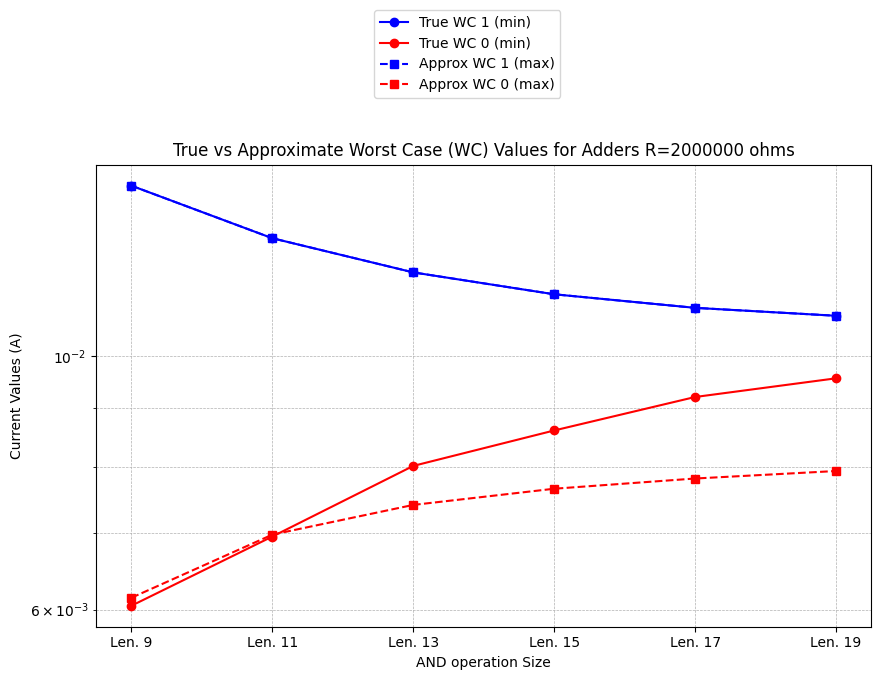

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# True values
true_min_ones_currents = real_min_One
true_max_zeros_currents = real_max_Zero

# Approx values (same as true values in provided log)
approx_min_ones_currents = opt_min_One
approx_max_zeros_currents = opt_max_Zero

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(bit_sizes_and_length, true_min_ones_currents, 'bo-', label='True WC 1 (min)')
plt.plot(bit_sizes_and_length, true_max_zeros_currents, 'ro-', label='True WC 0 (min)')

plt.plot(bit_sizes_and_length, approx_min_ones_currents, 'bs--', label='Approx WC 1 (max)')
plt.plot(bit_sizes_and_length, approx_max_zeros_currents, 'rs--', label='Approx WC 0 (max)')

plt.xlabel('AND operation Size')
plt.ylabel('Current Values (A)')
plt.yscale('log')  # Log scale for better visualization
plt.title('True vs Approximate Worst Case (WC) Values for Adders R=2000000 ohms')
# Placing legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.35, 1.35))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Force x-ticks to be each integer from 1 through the maximum bit size
plt.xticks(range(0, len(bit_sizes_and_length)))

# Show plot
plt.show()

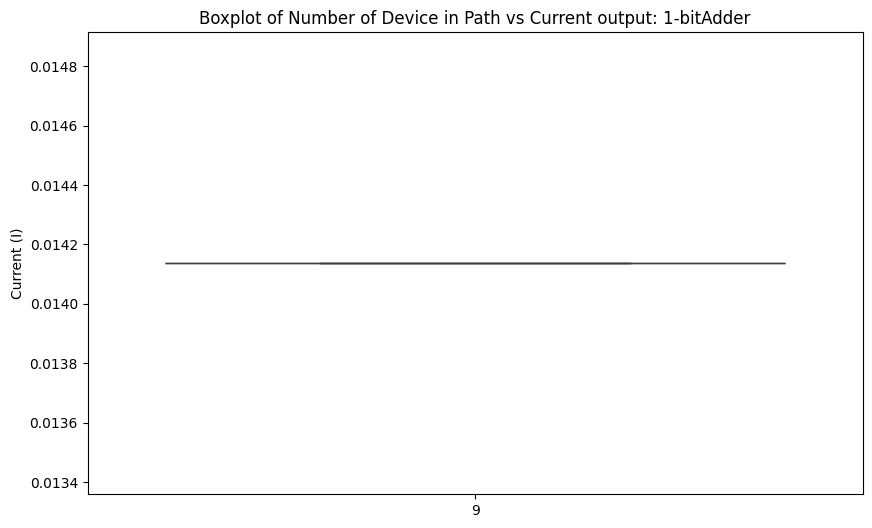

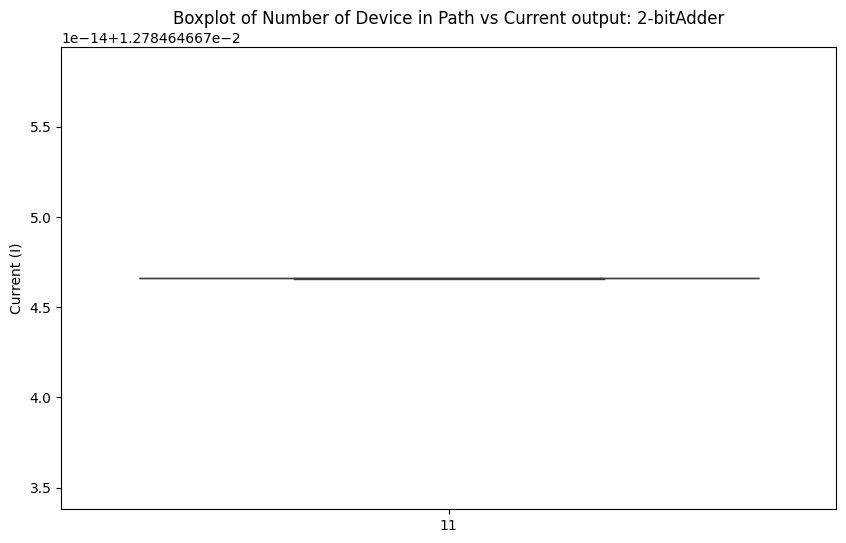

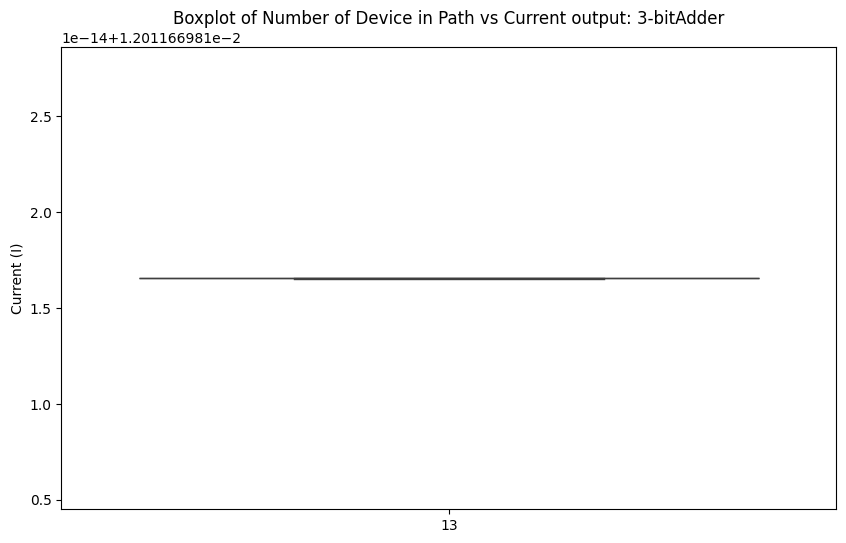

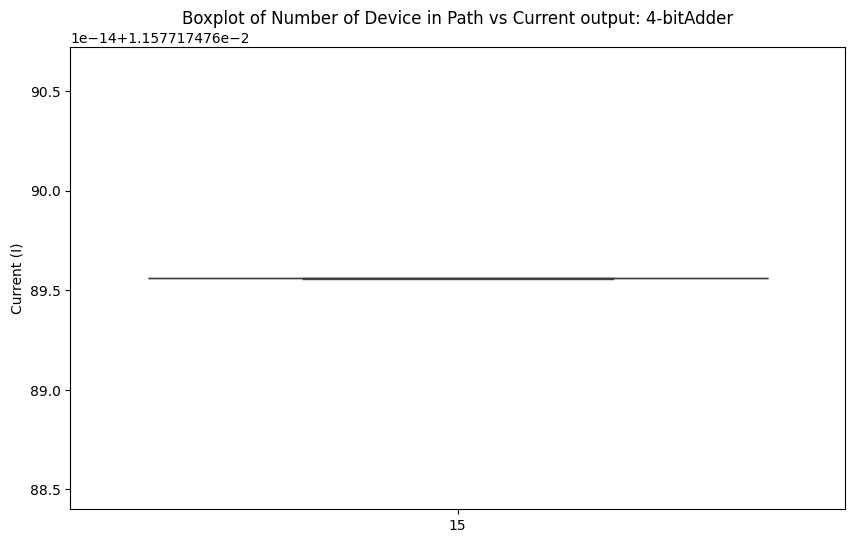

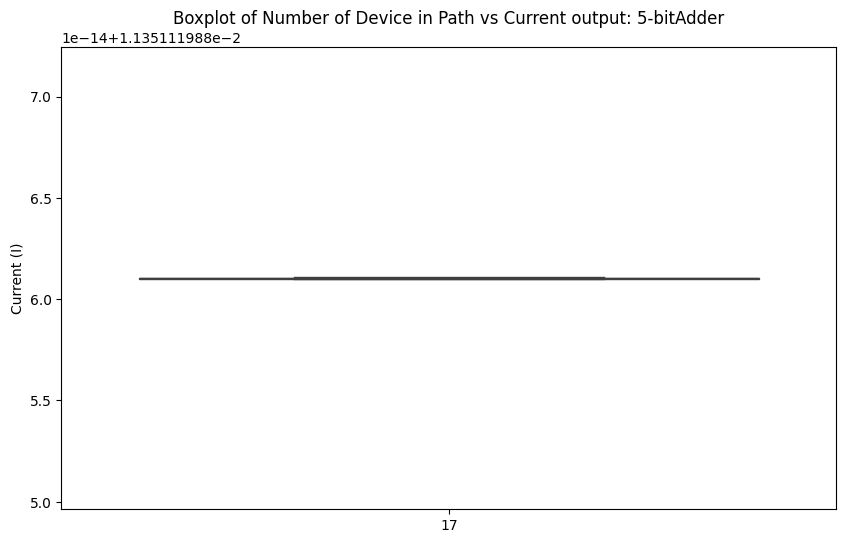

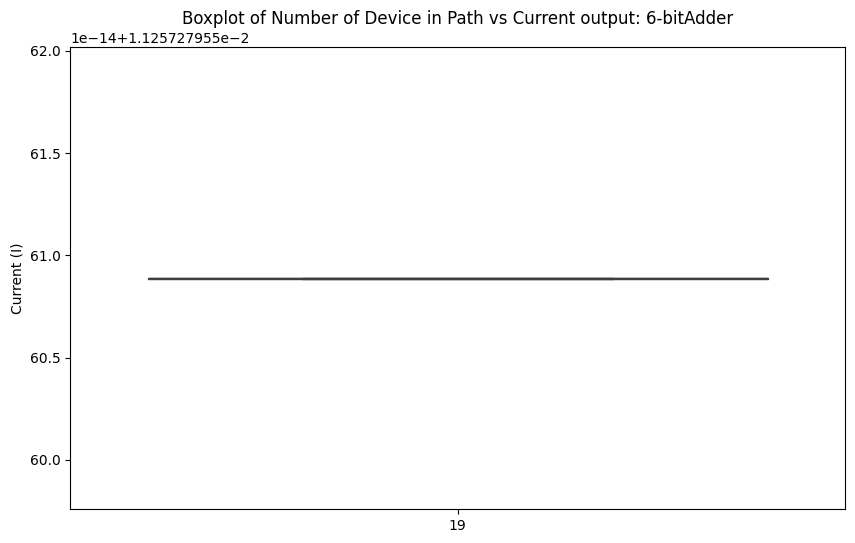

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_from_sorted_hashmap(data_map, adderBit, sort_keys=True):
    """
    Plots a boxplot (quartile graph) from a hashmap where:
    - Keys are labels for the boxplot.
    - Values are lists of values to be plotted.
    - Sorts the keys before plotting if sort_keys is True.
    """
    # Sort the dictionary by keys if required
    if sort_keys:
        data_map = dict(sorted(data_map.items()))

    # Extract sorted labels and corresponding data
    labels = list(data_map.keys())
    data = list(data_map.values())

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    
    # Set labels
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
    plt.ylabel("Current (I)")
    plt.title("Boxplot of Number of Device in Path vs Current output: "+adderBit)

    # Show the plot
    plt.show()

for adderBit in Adder_guardbandsVsReistancesDetailsMaps:
    plot_boxplot_from_sorted_hashmap(Adder_guardbandsVsReistancesDetailsMaps[adderBit]['AdderNumDevicesToCurrents_Map'], adderBit)

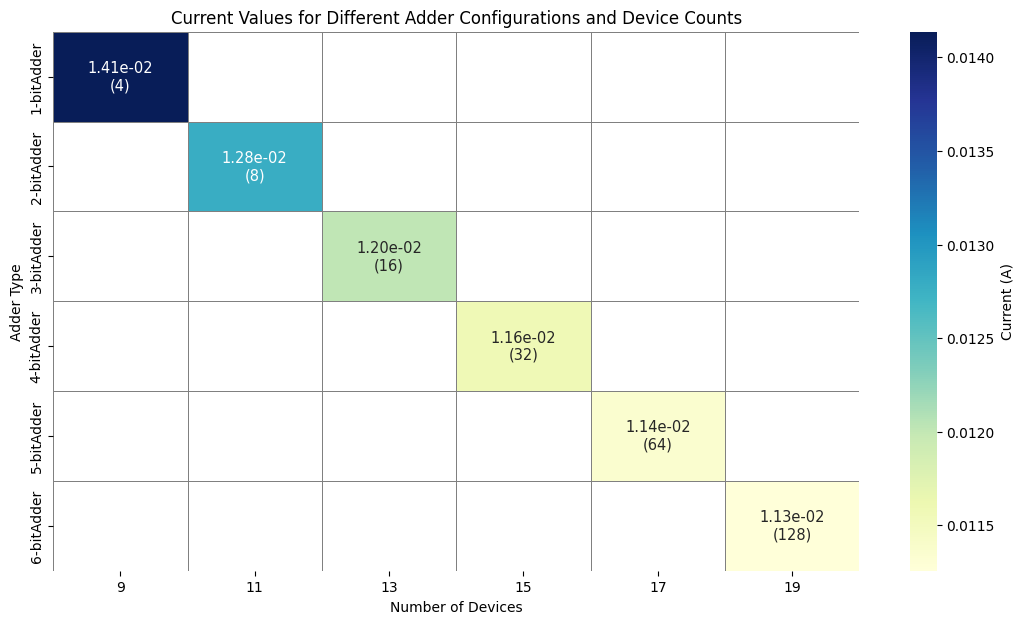

In [123]:
# Extract unique adders and device counts
adders = list(Adder_guardbandsVsReistancesDetailsMaps.keys())
devices = sorted({device for adder in adders for device in Adder_guardbandsVsReistancesDetailsMaps[adder]['AdderNumDevicesToAvgCurrent_Map'].keys()})

# Create a DataFrame to hold the current values
data = pd.DataFrame(index=adders, columns=devices, dtype=float)

# Create an annotation matrix for the heatmap text
annot_matrix = data.astype(str)

# Populate the DataFrame with current values and create annotation text
for adder in adders:
    for device in devices:
        if device in Adder_guardbandsVsReistancesDetailsMaps[adder]['AdderNumDevicesToAvgCurrent_Map']:
            current = Adder_guardbandsVsReistancesDetailsMaps[adder]['AdderNumDevicesToAvgCurrent_Map'][device]
            freqDevices = Adder_guardbandsVsReistancesDetailsMaps[adder]["AdderFrequencyOfNumDevices"][device]

            data.loc[adder, device] = current

            # Formatting annotation with scientific notation for current and frequency on the next line
            annot_matrix.loc[adder, device] = f"{current:.2e}\n({freqDevices})"
        else:
            annot_matrix.loc[adder, device] = ""


# Plotting the heatmap
plt.figure(figsize=(13, 7))
ax = sns.heatmap(data, annot=annot_matrix.values, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Current (A)'},
                 linewidths=0.5, linecolor='gray', annot_kws={"fontsize": 10.5})  # Adjust font size here

# Set labels and title
plt.xlabel('Number of Devices')
plt.ylabel('Adder Type')
plt.title('Current Values for Different Adder Configurations and Device Counts')

# Show the plot
plt.show()

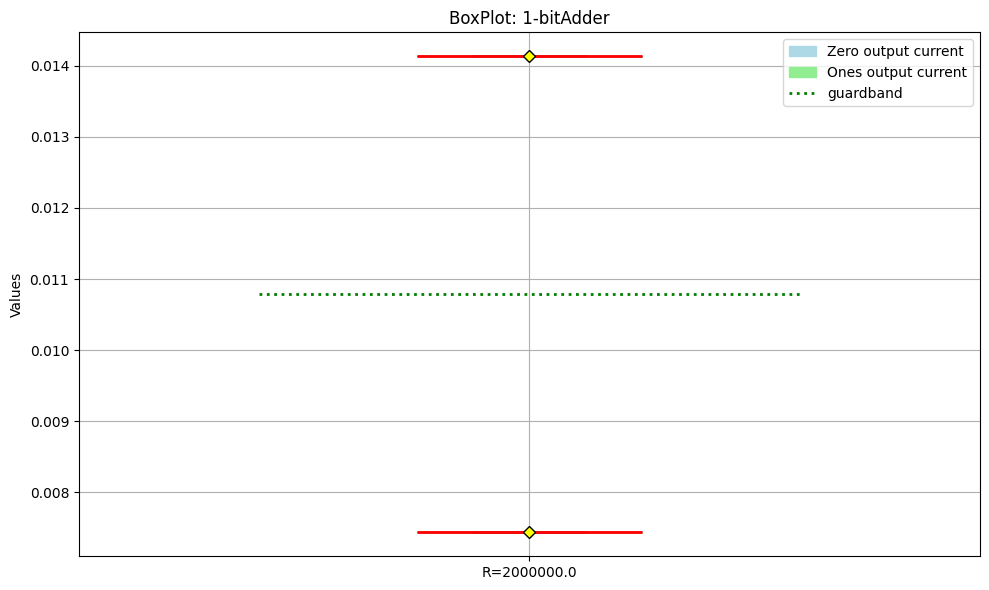

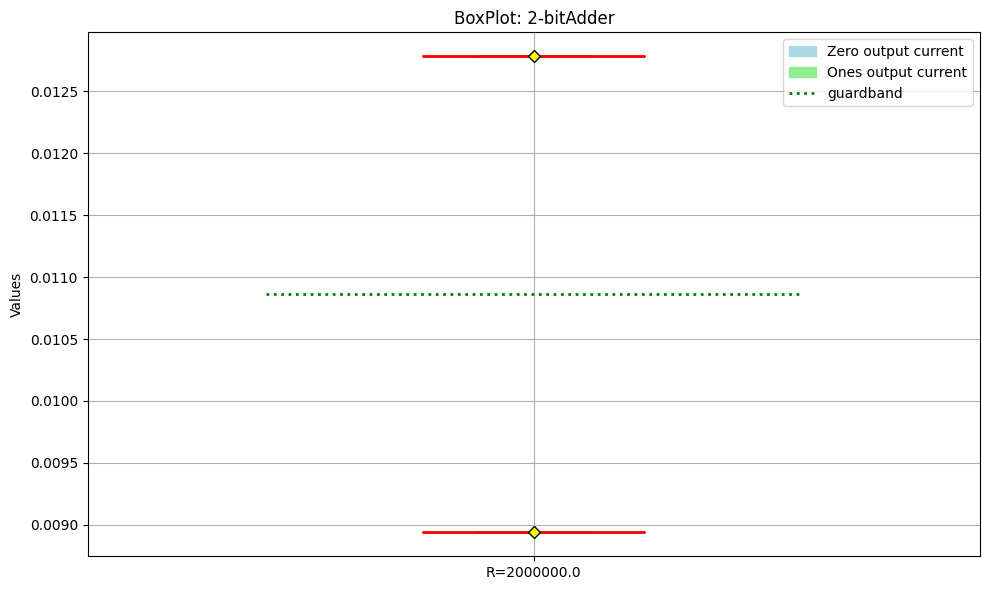

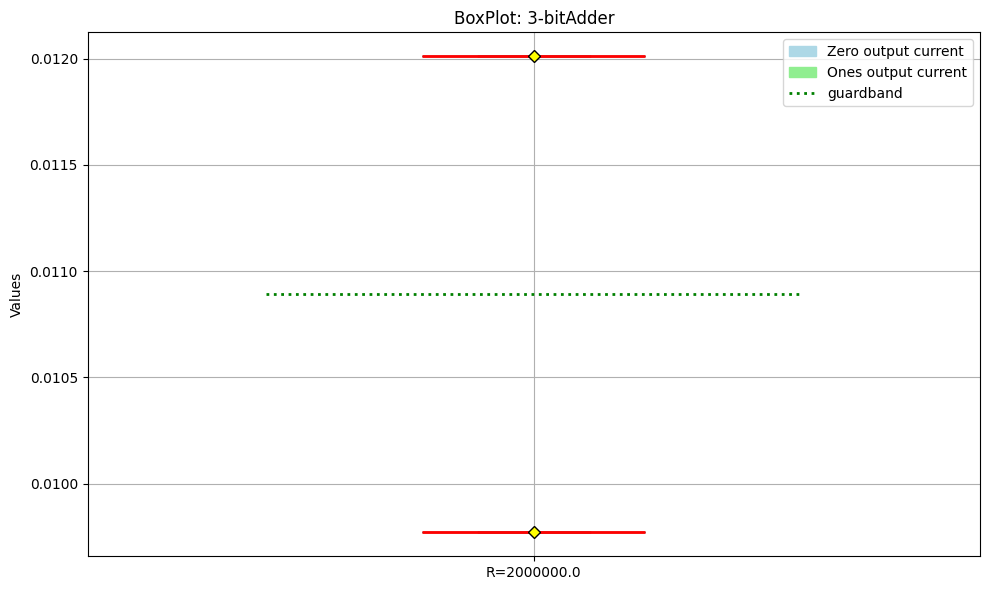

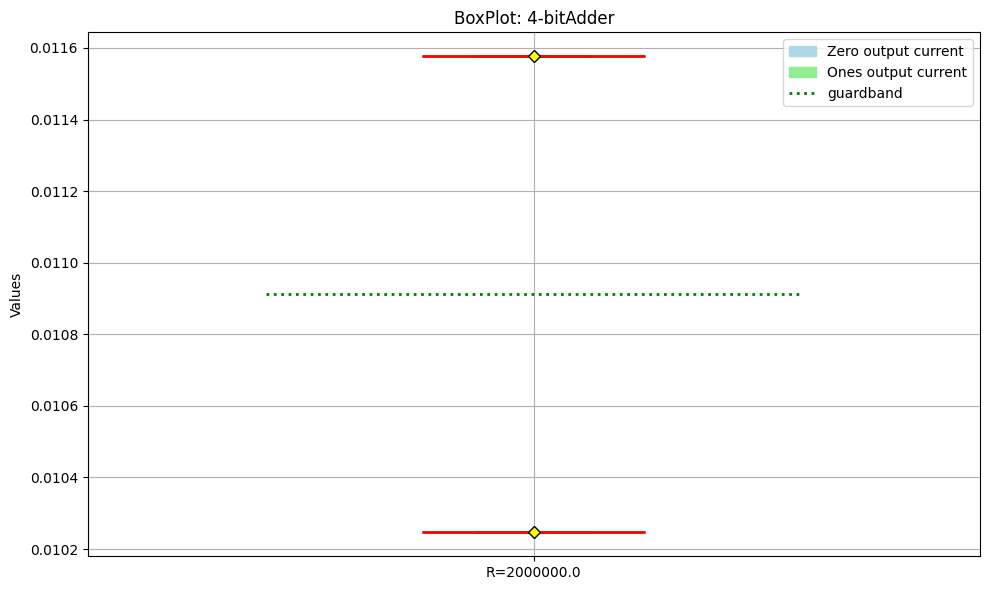

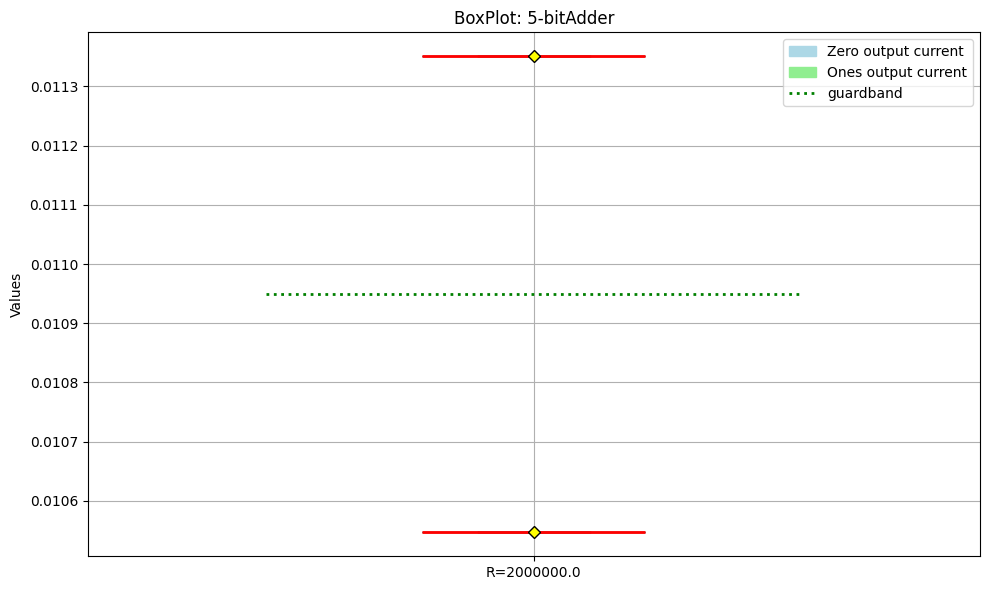

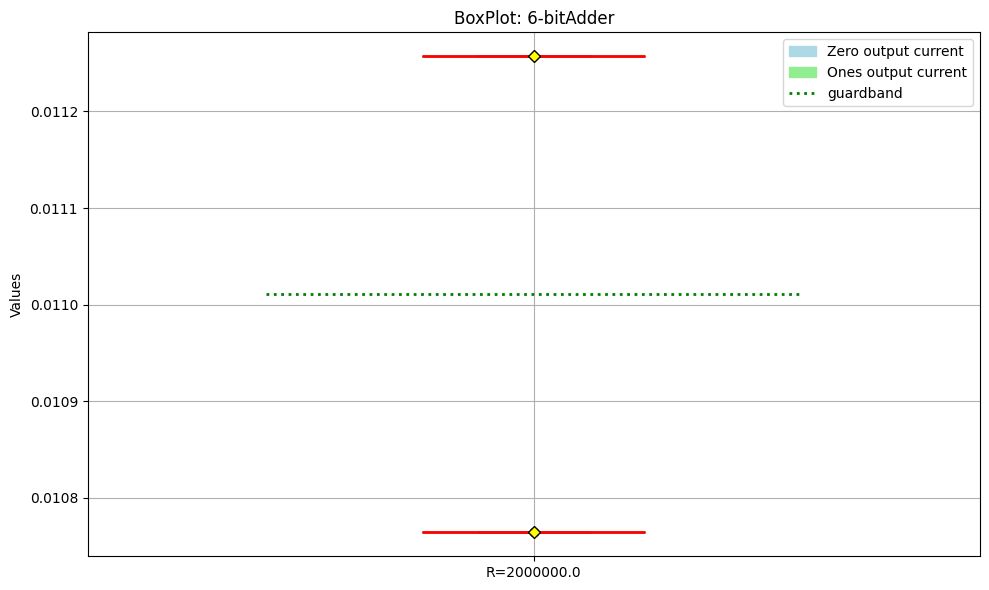

In [124]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


with open("Data/Adder_guardbandsVsReistancesDetailsMaps.pkl", "rb") as f:
    Adder_guardbandsVsReistancesDetailsMaps = pickle.load(f)

Adder_guardbandsVsReistancesDetailsMaps_keys = list(Adder_guardbandsVsReistancesDetailsMaps.keys())
for i in range(len(Adder_guardbandsVsReistancesDetailsMaps_keys)):
    key_adder = Adder_guardbandsVsReistancesDetailsMaps_keys[i]
    Adder_guardbandsVsReistancesDetailsMap = Adder_guardbandsVsReistancesDetailsMaps[key_adder]

    dataZeros = []
    dataOnes = []
    group_labels = []
    
    # Positions for each group
    pos = []
    guardband_values = []

    len_record_details = len(Adder_guardbandsVsReistancesDetailsMap["guardbands"])
    
    for j in range(len_record_details):
        dataZeros.append(Adder_guardbandsVsReistancesDetailsMap["zerosCurrents_lst"][j])
        dataOnes.append(Adder_guardbandsVsReistancesDetailsMap["onesCurrents_lst"][j])
        group_labels.append("R="+str(Adder_guardbandsVsReistancesDetailsMap["resistance_values"][j]))

        guardband_values.append(max(Adder_guardbandsVsReistancesDetailsMap["zerosCurrents_lst"][j])+(Adder_guardbandsVsReistancesDetailsMap["guardbands"][j]/2))
    
        pos.append(j+1)

    if(pos):

        plt.figure(figsize=(10, 6))
    
        
        # Plot dataZeros
        bp_zeros = plt.boxplot(
            dataZeros, 
            positions=pos, 
            patch_artist=True, 
            widths=0.25,             # Adjust width as desired
            showmeans=True,          
            boxprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2),
            meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='yellow')
        )
        
        # Color the boxes (dataZeros)
        for patch in bp_zeros['boxes']:
            patch.set_facecolor('lightblue')
        
        # Plot dataOnes
        bp_ones = plt.boxplot(
            dataOnes, 
            positions=pos, 
            patch_artist=True, 
            widths=0.25,
            showmeans=True,
            boxprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2),
            meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='yellow')
        )
    
        # Add green dotted lines based on each group's guardband value
        for j, guardband_value in enumerate(guardband_values):
            # We'll draw a short line around x_val (from x_val-0.3 to x_val+0.3):
            plt.hlines(
                y=guardband_value,
                xmin=pos[j]-0.3,
                xmax=pos[j]+0.3,
                colors='green',
                linestyles='dotted',
                linewidth=2
            )
        
        # Color the boxes (dataOnes)
        for patch in bp_ones['boxes']:
            patch.set_facecolor('lightgreen')
        
        # Move x-ticks to the midpoint between the two boxplots of each group
        plt.xticks(pos, group_labels)
        
        plt.ylabel("Values")
        plt.title("BoxPlot: "+key_adder)
        plt.grid(True)
        
        # Create legend elements
        zero_patch = mpatches.Patch(color='lightblue', label='Zero output current')
        one_patch = mpatches.Patch(color='lightgreen', label='Ones output current')
        guardband_line = mlines.Line2D([], [], color='green', linestyle='dotted', linewidth=2, label='guardband')
    
        plt.legend(handles=[zero_patch, one_patch, guardband_line], loc='upper right')
        
        plt.tight_layout()
        plt.show()

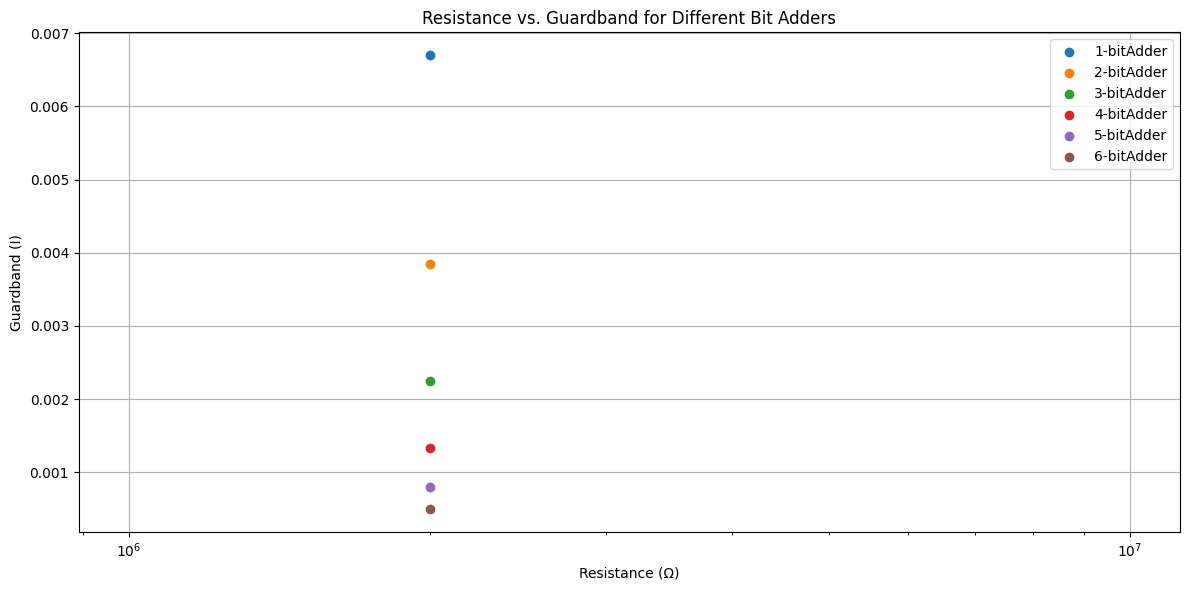

In [125]:
with open("Data/Adder_guardbandsVsReistancesDetailsMaps.pkl", "rb") as f:
    Adder_guardbandsVsReistancesDetailsMaps = pickle.load(f)

plt.figure(figsize=(12, 6))

# A color map or predefined list of colors can be used if you have multiple adders
# For example: colors = plt.cm.tab10(np.linspace(0, 1, len(Adder_guardbandsVsReistancesDetailsMaps)))
# But often letting matplotlib handle defaults is fine.

for i, (adder_name, data) in enumerate(Adder_guardbandsVsReistancesDetailsMaps.items()):
    guardbands = data['guardbands']
    resistances = data['resistance_values']

    
    # Plot them (resistance on x-axis, guardband on y-axis)
    # marker='o' to see points, linestyle='-' to connect them
    plt.scatter(
        resistances, guardbands, 
        marker='o', 
        label=adder_name
    )

plt.xscale('log')  # Often helpful if resistance spans large orders of magnitude
plt.xlabel('Resistance (Ω)')
plt.ylabel('Guardband (I)')
plt.title('Resistance vs. Guardband for Different Bit Adders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [735]:
# Suppose you have the following lists (all of the same length)
AdderBit = ["1-Bit Adder", "2-Bit Adder", "3-Bit Adder", "4-Bit Adder", "5-Bit Adder"]
SBDDSize = ['13 x 9', '26 x 18', '39 x 27', '52 x 36', '131 x 76']
CrossbarSize = [16, 32, 64, 64, 256]
NumberOfBooleanPermutations = [2, 4, 6, 8, 10]
NumberOfBooleanIterations = [2**2, 2**4, 2**6, 2**8, 2**10]
TimeForEachIterations = [1.5, 8.5, 50, 110, 410]
TotalTimeForEachIterations = [NumberOfBooleanIterations[i]*TimeForEachIterations[i] for i in range(len(NumberOfBooleanIterations))]
TotalTimeInHours = [TotalTimeForEachIterations[i]/3600 for i in range(len(TotalTimeForEachIterations))]
# Put them into a dictionary where each key is the column name,
# and each value is one of the lists:
data = {
    "AdderBit": AdderBit,
    "SBDDSize (V x E)": SBDDSize,
    "CrossbarSize >max(V, E)": CrossbarSize,
    "Number of boolean inputs (n)":NumberOfBooleanPermutations,
    "Total Input permuatations (2^n)":NumberOfBooleanIterations,
    "Time for each boolean input (t)":TimeForEachIterations,
    "Total Time For all boolean inputs ....... T = (t x 2^n)": TotalTimeForEachIterations,
    "Total Time In Hours For Single Binary search iterations of resitance Thr = (T/3600) hours": TotalTimeInHours,
    "Total Iterations (ThrX10) time": [i*10 for i in TotalTimeInHours]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

df

,AdderBit,SBDDSize (V x E),"CrossbarSize >max(V, E)",Number of boolean inputs (n),Total Input permuatations (2^n),Time for each boolean input (t),Total Time For all boolean inputs ....... T = (t x 2^n),Total Time In Hours For Single Binary search iterations of resitance Thr = (T/3600) hours,Total Iterations (ThrX10) time
0,1-Bit Adder,13 x 9,16,2,4,1.5,6.0,0.001667,0.016667
1,2-Bit Adder,26 x 18,32,4,16,8.5,136.0,0.037778,0.377778
2,3-Bit Adder,39 x 27,64,6,64,50.0,3200.0,0.888889,8.888889
3,4-Bit Adder,52 x 36,64,8,256,110.0,28160.0,7.822222,78.222222
4,5-Bit Adder,131 x 76,256,10,1024,410.0,419840.0,116.622222,1166.222222


In [64]:
import numpy as np
import time
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def check_matrix_sparsity_and_efficiency(A, b=None, sparsity_threshold=0.3):
    """
    Checks if a given 2D NumPy matrix A is sparse, based on the ratio of non-zeros.
    If b is given, also compare the runtime of dense vs. sparse solvers.

    Parameters
    ----------
    A : np.matrix or np.ndarray
        The matrix of interest.
    b : np.ndarray or list or None, optional
        The RHS vector for testing linear solving.
        If None, no solver timing is performed.
    sparsity_threshold : float
        If non_zero_ratio < sparsity_threshold, we classify the matrix as "sparse".

    Returns
    -------
    None
    """

    # Ensure A is a NumPy array
    A_arr = np.array(A, dtype=float)  # convert np.matrix to np.ndarray if needed

    print("Matrix dimentions (m x m):", A_arr.shape)
    
    # 1) Check the sparsity ratio
    total_elements = A_arr.size
    nonzero_elements = np.count_nonzero(A_arr)
    nonzero_ratio = nonzero_elements / total_elements
    zero_ratio = 1.0 - nonzero_ratio

    print("=== Sparsity Check ===")
    print(f"Matrix shape: {A_arr.shape}")
    print(f"Total elements: {total_elements}")
    print(f"Non-zero elements: {nonzero_elements}")
    print(f"Non-zero ratio: {nonzero_ratio:.2f}  ({nonzero_ratio*100:.2f} %)")
    print(f"Zero ratio: {zero_ratio:.2f}        ({zero_ratio*100:.2f} %)")

    if nonzero_ratio < sparsity_threshold:
        print("Matrix is considered SPARSE based on the given threshold.")
    else:
        print("Matrix is NOT considered sparse based on the given threshold.")

    # 2) (Optional) Compare efficiency of dense vs. sparse solver
    if b is not None:
        print("\n=== Solver Efficiency Check ===")
        
        # Ensure b is a 1D array
        b_arr = np.array(b, dtype=float).ravel()

        # Dense solve timing
        start_time = time.time()
        x_dense = np.linalg.solve(A_arr, b_arr)
        dense_time = time.time() - start_time

        # Sparse solve timing
        A_csr = sp.csr_matrix(A_arr)
        start_time = time.time()
        x_sparse = spla.spsolve(A_csr, b_arr)
        sparse_time = time.time() - start_time

        print(f"Dense solve time  : {dense_time:.6f} seconds")
        print(f"Sparse solve time : {sparse_time:.6f} seconds")

        # (Optional) Compare solutions
        diff = np.linalg.norm(x_dense - x_sparse, ord=2)
        print(f"Difference between dense and sparse solutions: {diff:.2e}")

    print("\nDone.\n")


# ======================
# Example usage:
# ======================
if __name__ == "__main__":
    # Example 1: A small "sparse" matrix
    A_example_1 = AnalogPathTest.tempMatrix[0]
    b_example_1 = AnalogPathTest.tempMatrix[1]

    check_matrix_sparsity_and_efficiency(A_example_1, b_example_1, sparsity_threshold=0.2)

Matrix dimentions (m x m): (128, 128)
=== Sparsity Check ===
Matrix shape: (128, 128)
Total elements: 16384
Non-zero elements: 8256
Non-zero ratio: 0.50  (50.39 %)
Zero ratio: 0.50        (49.61 %)
Matrix is NOT considered sparse based on the given threshold.

=== Solver Efficiency Check ===
Dense solve time  : 0.000000 seconds
Sparse solve time : 0.001999 seconds
Difference between dense and sparse solutions: 8.72e-15

Done.



In [333]:
def extend_path_by_two(orig_path):
    
    new_path = []
    new_path.extend(orig_path[:-2])

    subpath = []
    final_node = orig_path[-1]
    
    prev1, prev2 = new_path[-1], new_path[-2]
    if(prev1[0]==prev2[0]):
        if((7,4) not in orig_path):
            subpath.append((7, prev1[1]))
            subpath.append((7, 4))
            subpath.append((final_node[0], 4))
    elif(prev1[1]==prev2[1]):
        print("dont know")
        return
    
    new_path.extend(subpath)
    new_path.append(final_node)
    
    return new_path

# ---------------------------
# Example usage:
original_path = [(0, 10), (3, 10), (3, 7), (6, 7), (6, 3), (8, 3), (8, 12)]
# [(0, 10), (3, 10), (3, 7), (6, 7), (6, 3), (7, 3), (7, 4), (8, 4), (8, 12)]
extended = extend_path_by_two(original_path)
print("Original:", original_path)
print("Extended:", extended)

Original: [(0, 10), (3, 10), (3, 7), (6, 7), (6, 3), (8, 3), (8, 12)]
Extended: [(0, 10), (3, 10), (3, 7), (6, 7), (6, 3), (7, 3), (7, 4), (8, 4), (8, 12)]
